In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    # "text.usetex": True,
    "font.family": "sans-serif",
    # "font.sans-serif": ["Helvetica"]
    })

In [2]:
df_all_x =pd.read_csv('../data/processed/0.1-initial-exploration.csv')
dat = df_all_x[df_all_x['year'] > 2010]
df_track_posiotion = dat[['gridStart','positionOrder','circuitId' ,'circuitName']]

In [3]:
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Australian Grand Prix'],'Australian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['European Grand Prix'],'European')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Emilia Romagna Grand Prix'],'Emilia R')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Belgian Grand Prix'],'Belgian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['German Grand Prix'],'German')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Austrian Grand Prix'],'Austrian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Malaysian Grand Prix'],'Malaysian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Tuscan Grand Prix'],'Tuscan')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Singapore Grand Prix'],'Singapore')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Monaco Grand Prix'],'Monaco')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Turkish Grand Prix'],'Turkish')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['United States Grand Prix'],'USA')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Brazilian Grand Prix'],'Brazilian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Italian Grand Prix'],'Italian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Russian Grand Prix'],'Russian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Qatar Grand Prix'],'Qatar')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Abu Dhabi Grand Prix'],'Abu Dhabi')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Canadian Grand Prix'],'Canadian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Bahrain Grand Prix'],'Bahrain')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Hungarian Grand Prix'],'Hungarian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['British Grand Prix'],'British')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Japanese Grand Prix'],'Japanese')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Spanish Grand Prix'],'Spanish')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Indian Grand Prix'],'Indian')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Saudi Arabian Grand Prix'],'Saudi Ar')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Mexican Grand Prix'],'Mexican')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Dutch Grand Prix'],'Dutch')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Chinese Grand Prix'],'Chinese')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Korean Grand Prix'],'Korean')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['French Grand Prix'],'French')
df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Portuguese Grand Prix'],'Portuguese')

/var/folders/ww/g01k38ln5rx5dm_b_qtwpdkc0000gn/T/ipykernel_23436/2655020733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['Australian Grand Prix'],'Australian')
/var/folders/ww/g01k38ln5rx5dm_b_qtwpdkc0000gn/T/ipykernel_23436/2655020733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_track_posiotion['circuitName'] = df_track_posiotion['circuitName'].replace(['European Grand Prix'],'European')
/var/folders/ww/g01k38ln

In [4]:
track_id_dublicated = df_track_posiotion['circuitId'].to_numpy()
track_id = []
for dublicates in track_id_dublicated:
    if dublicates not in track_id:
        track_id.append(dublicates)

df_safe = df_track_posiotion
correlations = {}

for track in track_id:
    current = df_track_posiotion.loc[df_track_posiotion['circuitId'] == track]
    r = np.corrcoef(current['gridStart'],current['positionOrder'])
    correlations[current['circuitName'].iloc[0]] = r[0][1]
    df_track_posiotion = df_safe
    
correlations = dict(sorted(correlations.items(), key=lambda item: item[1]))

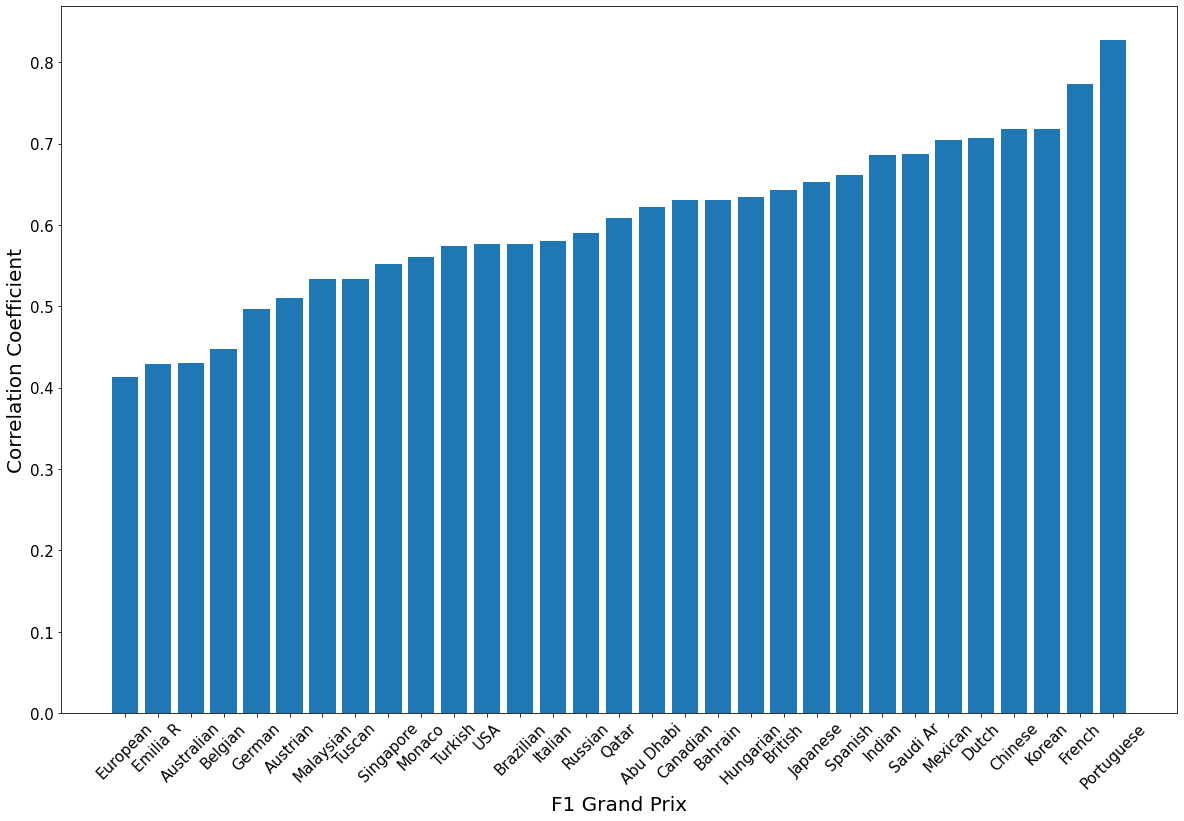

In [5]:
names = list(correlations.keys())
values = list(correlations.values())

plt.figure(figsize=(20, 13))
plt.bar(range(len(correlations)), values, tick_label=names)

plt.tick_params(axis='x', rotation=45, labelsize = 15)
plt.tick_params(axis='y',  labelsize = 15)
plt.xlabel("F1 Grand Prix",fontsize=20)
plt.ylabel("Correlation Coefficient",fontsize=20)
plt.savefig("../reports/figures/correlation_start_finish" + ".eps")